In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection  import train_test_split

In [3]:
df=pd.read_csv('all_annotated.tsv',delimiter='\t',encoding='utf-8')

In [4]:
df.head()

,Tweet ID,Country,Date,Tweet,Definitely English,Ambiguous,Definitely Not English,Code-Switched,Ambiguous due to Named Entities,Automatically Generated Tweets
0,434215992731136000,TR,2014-02-14,Bugün bulusmami lazimdiii,0,0,1,0,0,0
1,285903159434563584,TR,2013-01-01,Volkan konak adami tribe sokar yemin ederim :D,0,0,1,0,0,0
2,285948076496142336,NL,2013-01-01,Bed,1,0,0,0,0,0
3,285965965118824448,US,2013-01-01,I felt my first flash of violence at some fool...,1,0,0,0,0,0
4,286057979831275520,US,2013-01-01,Ladies drink and get in free till 10:30,1,0,0,0,0,0


In [5]:
df.Country.unique()

array(['TR', 'NL', 'US', 'GB', 'RS', 'MX', 'CA', 'MY', 'BR', 'ID', 'IE',
       'RU', 'HU', 'FR', 'ES', 'CL', 'JP', 'IT', 'SE', 'BY', 'LU', 'PT',
       'BE', 'DE', 'FI', 'NO', 'CH', 'LV', 'EE', 'UA', 'AT', nan, 'ZA',
       'AM', 'XK', 'PL', 'CO', 'TH', 'AR', 'PH', 'SA', 'NG', 'IN', 'EG',
       'JO', 'EC', 'YE', 'LK', 'UY', 'KW', 'QA', 'PY', 'AU', 'SN', 'HN',
       'CN', 'PA', 'SG', 'VC', 'VE', 'TW', 'KE', 'TZ', 'TT', 'BH', 'PR',
       'PE', 'AE', 'LB', 'OM', 'PK', 'BS', 'GH', 'DO', 'UZ', 'DK', 'GR',
       'LY', 'SV', 'RE', 'MQ', 'JM', 'CR', 'KR', 'MP', 'IQ', 'IR', 'GT',
       'MN', 'GE', 'NI', 'BN', 'HK', 'DZ', 'CM', 'GI', 'RO', 'SY', 'SL',
       'IL', 'MA', 'CZ', 'AZ', 'HR', 'BW', 'NP', 'AG', 'CY', 'VN', 'TN',
       'RW', 'BA', 'NZ', 'LS', 'BO', 'NE', 'MO', 'ST', 'BG', 'FJ', 'KZ',
       'CU', 'TM', 'SD', 'AQ', 'ZM', 'KH', 'BM', 'PW'], dtype=object)

In [6]:
df.shape

(10502, 10)

In [7]:
from nltk.classify import textcat
cls = textcat.TextCat()

In [8]:
%%time
cls.guess_language(df.Tweet[0])

CPU times: user 220 ms, sys: 8.45 ms, total: 229 ms
Wall time: 239 ms


'tur'

In [9]:
%%time
df['lang'] = df.Tweet.apply(lambda row: cls.guess_language(row))

CPU times: user 1h 8min 47s, sys: 1min 1s, total: 1h 9min 48s
Wall time: 1h 17min 11s


In [10]:
df.head()

,Tweet ID,Country,Date,Tweet,Definitely English,Ambiguous,Definitely Not English,Code-Switched,Ambiguous due to Named Entities,Automatically Generated Tweets,lang
0,434215992731136000,TR,2014-02-14,Bugün bulusmami lazimdiii,0,0,1,0,0,0,tur
1,285903159434563584,TR,2013-01-01,Volkan konak adami tribe sokar yemin ederim :D,0,0,1,0,0,0,ind
2,285948076496142336,NL,2013-01-01,Bed,1,0,0,0,0,0,bre
3,285965965118824448,US,2013-01-01,I felt my first flash of violence at some fool...,1,0,0,0,0,0,eng
4,286057979831275520,US,2013-01-01,Ladies drink and get in free till 10:30,1,0,0,0,0,0,eng


In [36]:
if( df.lang == 'deu'):
    print(df.Tweet)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [16]:
df['Counter'] = 1

In [17]:
df.to_excel('output.xlsx')

In [18]:
df.head()

,Tweet ID,Country,Date,Tweet,Definitely English,Ambiguous,Definitely Not English,Code-Switched,Ambiguous due to Named Entities,Automatically Generated Tweets,lang,Counter
0,434215992731136000,TR,2014-02-14,Bugün bulusmami lazimdiii,0,0,1,0,0,0,tur,1
1,285903159434563584,TR,2013-01-01,Volkan konak adami tribe sokar yemin ederim :D,0,0,1,0,0,0,ind,1
2,285948076496142336,NL,2013-01-01,Bed,1,0,0,0,0,0,bre,1
3,285965965118824448,US,2013-01-01,I felt my first flash of violence at some fool...,1,0,0,0,0,0,eng,1
4,286057979831275520,US,2013-01-01,Ladies drink and get in free till 10:30,1,0,0,0,0,0,eng,1


In [19]:
df.shape

(10502, 12)

In [20]:
import matplotlib.pyplot as plt

In [25]:
Country = df.Country.unique()

In [30]:
from collections import Counter
print(Country,Counter(df.Country).values())

['TR' 'NL' 'US' 'GB' 'RS' 'MX' 'CA' 'MY' 'BR' 'ID' 'IE' 'RU' 'HU' 'FR'
 'ES' 'CL' 'JP' 'IT' 'SE' 'BY' 'LU' 'PT' 'BE' 'DE' 'FI' 'NO' 'CH' 'LV'
 'EE' 'UA' 'AT' nan 'ZA' 'AM' 'XK' 'PL' 'CO' 'TH' 'AR' 'PH' 'SA' 'NG' 'IN'
 'EG' 'JO' 'EC' 'YE' 'LK' 'UY' 'KW' 'QA' 'PY' 'AU' 'SN' 'HN' 'CN' 'PA'
 'SG' 'VC' 'VE' 'TW' 'KE' 'TZ' 'TT' 'BH' 'PR' 'PE' 'AE' 'LB' 'OM' 'PK'
 'BS' 'GH' 'DO' 'UZ' 'DK' 'GR' 'LY' 'SV' 'RE' 'MQ' 'JM' 'CR' 'KR' 'MP'
 'IQ' 'IR' 'GT' 'MN' 'GE' 'NI' 'BN' 'HK' 'DZ' 'CM' 'GI' 'RO' 'SY' 'SL'
 'IL' 'MA' 'CZ' 'AZ' 'HR' 'BW' 'NP' 'AG' 'CY' 'VN' 'TN' 'RW' 'BA' 'NZ'
 'LS' 'BO' 'NE' 'MO' 'ST' 'BG' 'FJ' 'KZ' 'CU' 'TM' 'SD' 'AQ' 'ZM' 'KH'
 'BM' 'PW'] dict_values([624, 83, 2966, 481, 9, 229, 121, 395, 1195, 1099, 34, 164, 6, 265, 340, 90, 505, 95, 33, 16, 2, 56, 22, 52, 6, 11, 20, 11, 4, 27, 6, 10, 67, 1, 3, 16, 62, 168, 312, 233, 58, 27, 29, 22, 6, 12, 3, 6, 39, 41, 3, 23, 39, 1, 3, 10, 13, 34, 1, 38, 9, 12, 1, 4, 4, 10, 14, 13, 2, 1, 5, 2, 12, 13, 2, 3, 11, 4, 7, 1, 1, 5, 12, 13, 1, 3, 2,

In [32]:
print(df.lang.unique(),Counter(df.lang).values())

['tur' 'ind' 'bre' 'eng' 'ces' 'ltz' 'nap' 'nds' 'sun' 'mlt' 'lad' 'sot'
 'por' 'rus' 'ssw' 'abk' 'arb' 'cat' 'deu' 'afr' 'nso' 'est' 'tzm' 'eng '
 'kac' 'nld' 'vls' 'glg' 'fra' 'nbl' 'fri' 'hrv' 'ast' 'tgl' 'swe' 'ita'
 'dan' 'gle' 'hun' 'fuf' 'nno' 'glv' 'lmo' 'gaz' 'mly' 'qug' 'snk' 'khk'
 'kng' 'pap' 'pdc' 'nob' 'srp' 'pol' 'ses' 'cym' 'slv' 'swh' 'zne' 'eus'
 'src' 'ako' 'lue' 'epo' 'ukr' 'azj' 'kmr' 'czt' 'mir' 'ina' 'pcm' 'fin'
 'cor' 'kam' 'fur' 'pms' 'tuk' 'kik' 'mic' 'cha' 'gaa' 'als' 'lgg' 'gsc'
 'isl' 'som' 'hmo' 'urd' 'vec' 'hsb' 'hat' 'meu' 'tum' 'chk' 'ceb' 'tpi'
 'ttj' 'gsw' 'mwv' 'lnc' 'pam' 'sba' 'kha' 'lug' 'dua' 'run' 'bul' 'nau'
 'mah' 'pag' 'slk' 'hau' 'lus' 'gla' 'kmb' 'amr' 'bos' 'toi' 'ndo' 'csb'
 'bar' 'bel' 'mus' 'diq' 'cnh' 'tet' 'pis' 'hil' 'rmn' 'nyk' 'prv' 'jav'
 'haw' 'ven' 'nyn' 'smo' 'ibo' 'nav' 'sco' 'mam' 'lld' 'tha' 'lun' 'fub'
 'not' 'mfe' 'bis' 'lat' 'yad' 'bcl' 'yaf' 'vmw' 'ach' 'war' 'arg' 'miq'
 'snd' 'prs' 'fao' 'lms' 'cic' 'prq' 'wol' 'rar' '

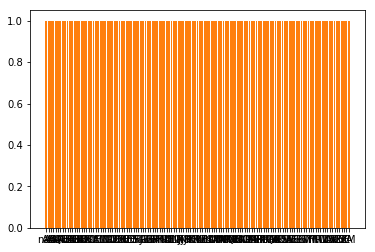

In [24]:
plt.bar(df.Country, df.Counter)
plt.show()

In [39]:
%%time
cls.guess_language('Ich heisse Madina. Ich bin 21 jahre alt.')

CPU times: user 286 ms, sys: 8.43 ms, total: 294 ms
Wall time: 295 ms


'deu'

In [41]:
%%time
cls.guess_language('Сәлем! Менің атым Мадина, Мен 21 жастамын.')

CPU times: user 51.6 ms, sys: 3.03 ms, total: 54.6 ms
Wall time: 53.2 ms


'kaz'

In [42]:
%%time
cls.guess_language('Hi! My name is Madina, I am 21 years old')

CPU times: user 308 ms, sys: 9.09 ms, total: 317 ms
Wall time: 323 ms


'eng'

In [43]:
%%time
cls.guess_language('Привет! Меня зовут Мадина, мне 21.')

CPU times: user 46.2 ms, sys: 1.93 ms, total: 48.1 ms
Wall time: 47 ms


'rus'